In [1]:
import os
import math
import fnmatch
import skimage
import scipy as sp
import numpy as np
import pandas as pd
import nibabel as nib
from sklearn import mixture
import matplotlib.pyplot as plt
from skimage.transform import resize
from nibabel.testing import data_path
from skimage import data, io, filters, exposure
from skimage.morphology import remove_small_holes, binary_closing, remove_small_objects, label

from nibabel import processing
from radiomics import featureextractor, imageoperations
import SimpleITK as sitk

import glob

import nilearn

C:\Users\e.lavrova\AppData\Local\Continuum\anaconda3\lib\site-packages\dicom\__init__.py:53: UserWarning: 
This code is using an older version of pydicom, which is no longer 
maintained as of Jan 2017.  You can access the new pydicom features and API 
by installing `pydicom` from PyPI.
See 'Transitioning to pydicom 1.x' section at pydicom.readthedocs.org 
for more information.

  warnings.warn(msg)


In [2]:
cd = 'F:/CC-359/'

In [7]:
for i in range (358, 360):
    
    imagename = glob.glob(cd + 'Original_backup/Original/' + 'CC' + format(i, '04d') + '*.nii.gz')[0]
    maskname = glob.glob(cd + 'STAPLE_backup/' + 'CC' + format(i, '04d') + '*_staple.nii.gz')[0]
    
    image_nii = nib.load(imagename)
    mask_nii = nib.load(maskname)
    
    image = image_nii.get_data()
    mask = mask_nii.get_data()
    
    image_out = image*mask
    image_out_nii = nib.Nifti1Image(image_out, image_nii.affine)
    nib.save(image_out_nii, 'F:/art/' + format(i, '04d') + '.nii')
    
    print (format(i, '04d'))

0358
0359


In [1]:
from dipy.data import fetch_sherbrooke_3shell
fetch_sherbrooke_3shell()

C:\Users\e.lavrova\AppData\Local\Continuum\anaconda3\lib\site-packages\dicom\__init__.py:53: UserWarning: 
This code is using an older version of pydicom, which is no longer 
maintained as of Jan 2017.  You can access the new pydicom features and API 
by installing `pydicom` from PyPI.
See 'Transitioning to pydicom 1.x' section at pydicom.readthedocs.org 
for more information.

  warnings.warn(msg)


Creating new folder C:\Users\e.lavrova\.dipy\sherbrooke_3shell
Download Progress: [####################] 100.00%  of 183.58 MBDownloading "HARDI193.bval" to C:\Users\e.lavrova\.dipy\sherbrooke_3shell
Download Progress: [####################] 100.00%  of 0.00 MBDownloading "HARDI193.bvec" to C:\Users\e.lavrova\.dipy\sherbrooke_3shell
Download Progress: [####################] 100.00%  of 0.01 MBFiles successfully downloaded to C:\Users\e.lavrova\.dipy\sherbrooke_3shell


({'HARDI193.nii.gz': ('https://digital.lib.washington.edu/researchworks/bitstream/handle/1773/38475/HARDI193.nii.gz',
   '0b735e8f16695a37bfbd66aab136eb66'),
  'HARDI193.bval': ('https://digital.lib.washington.edu/researchworks/bitstream/handle/1773/38475/HARDI193.bval',
   'e9b9bb56252503ea49d31fb30a0ac637'),
  'HARDI193.bvec': ('https://digital.lib.washington.edu/researchworks/bitstream/handle/1773/38475/HARDI193.bvec',
   '0c83f7e8b917cd677ad58a078658ebb7')},
 'C:\\Users\\e.lavrova\\.dipy\\sherbrooke_3shell')

In [2]:
from os.path import expanduser, join
home = expanduser('~')

In [3]:
dname = join(home, '.dipy', 'sherbrooke_3shell')

In [6]:
fdwi = join(dname, 'HARDI193.nii.gz')
print(fdwi)
fbval = join(dname, 'HARDI193.bval')
print(fbval)
fbvec = join(dname, 'HARDI193.bvec')
print(fbvec)

C:\Users\e.lavrova\.dipy\sherbrooke_3shell\HARDI193.nii.gz
C:\Users\e.lavrova\.dipy\sherbrooke_3shell\HARDI193.bval
C:\Users\e.lavrova\.dipy\sherbrooke_3shell\HARDI193.bvec


In [7]:
import nibabel as nib
img = nib.load(fdwi)
data = img.get_data()

In [8]:
print(data.shape)

(128, 128, 60, 193)


In [9]:
print(img.header.get_zooms()[:3])

(2.0, 2.0, 2.0)


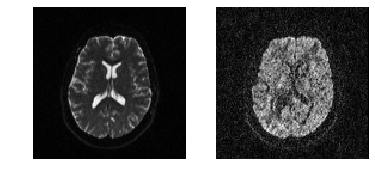

In [11]:
import matplotlib.pyplot as plt

axial_middle = data.shape[2] // 2
plt.figure('Showing the datasets')
plt.subplot(1, 2, 1).set_axis_off()
plt.imshow(data[:, :, axial_middle, 0].T, cmap='gray', origin='lower')
plt.subplot(1, 2, 2).set_axis_off()
plt.imshow(data[:, :, axial_middle, 10].T, cmap='gray', origin='lower')
plt.show()
#plt.savefig('data.png', bbox_inches='tight')

In [12]:
from dipy.io import read_bvals_bvecs
bvals, bvecs = read_bvals_bvecs(fbval, fbvec)

In [13]:
from dipy.core.gradients import gradient_table
gtab = gradient_table(bvals, bvecs)

In [14]:
print(gtab.info)

B-values shape (193,)
         min 0.000000 
         max 3500.000000 
B-vectors shape (193, 3)
         min -0.964050 
         max 0.999992 
None


In [15]:
print(gtab.bvals)

[   0. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.
 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.
 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.
 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.
 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.
 1000. 1000. 1000. 1000. 1000. 2000. 2000. 2000. 2000. 2000. 2000. 2000.
 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000.
 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000.
 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000.
 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000.
 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 3500. 3500. 3500.
 3500. 3500. 3500. 3500. 3500. 3500. 3500. 3500. 3500. 3500. 3500. 3500.
 3500. 3500. 3500. 3500. 3500. 3500. 3500. 3500. 3500. 3500. 3500. 3500.
 3500. 3500. 3500. 3500. 3500. 3500. 3500. 3500. 35

In [16]:
print(gtab.bvecs[:10, :])

[[ 0.          0.          0.        ]
 [ 0.999979   -0.00504001 -0.00402795]
 [ 0.          0.999992   -0.00398794]
 [-0.0257055   0.653861   -0.756178  ]
 [ 0.589518   -0.769236   -0.246462  ]
 [-0.235785   -0.529095   -0.815147  ]
 [-0.893578   -0.263559   -0.363394  ]
 [ 0.79784     0.133726   -0.587851  ]
 [ 0.232937    0.931884   -0.278087  ]
 [ 0.93672     0.144139   -0.31903   ]]


In [17]:
S0s = data[:, :, :, gtab.b0s_mask]

In [18]:
print(S0s.shape)

(128, 128, 60, 1)


In [357]:
from dipy.data import read_stanford_labels

hardi_img, gtab, labels_img = read_stanford_labels()
data = hardi_img.get_data()
labels = labels_img.get_data()
affine = hardi_img.affine

C:\Users\e.lavrova\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  after removing the cwd from sys.path.
C:\Users\e.lavrova\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  """


In [358]:
white_matter = (labels == 1) | (labels == 2)

In [359]:
from dipy.reconst.csdeconv import auto_response
from dipy.reconst.shm import CsaOdfModel
from dipy.data import default_sphere
from dipy.direction import peaks_from_model

response, ratio = auto_response(gtab, data, roi_radius=10, fa_thr=0.5)
csa_model = CsaOdfModel(gtab, sh_order=6)
csa_peaks = peaks_from_model(csa_model, data, default_sphere,
                             relative_peak_threshold=.8,
                             min_separation_angle=5,
                             mask=white_matter)

In [360]:
interactive = True

In [361]:
from dipy.viz import window, actor, has_fury

if has_fury:
    ren = window.Renderer()
    ren.background((1, 1, 1))
    ren.add(actor.peak_slicer(csa_peaks.peak_dirs,
                              csa_peaks.peak_values,
                              colors=None))

    window.record(ren, out_path='csa_direction_field.png', size=(900, 900))

    if interactive:
        window.show(ren, size=(800, 800))

In [362]:
from dipy.tracking.stopping_criterion import ThresholdStoppingCriterion

stopping_criterion = ThresholdStoppingCriterion(csa_peaks.gfa, .05)

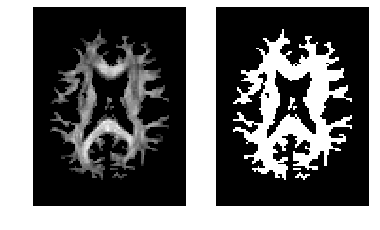

In [363]:
import matplotlib.pyplot as plt

sli = csa_peaks.gfa.shape[2] // 2
plt.figure('GFA')
plt.subplot(1, 2, 1).set_axis_off()
plt.imshow(csa_peaks.gfa[:, :, sli].T, cmap='gray', origin='lower')

plt.subplot(1, 2, 2).set_axis_off()
plt.imshow((csa_peaks.gfa[:, :, sli] > 0.05).T, cmap='gray', origin='lower')


In [364]:
from dipy.tracking import utils

seed_mask = (labels == 2)
seeds = utils.seeds_from_mask(seed_mask, affine, density=[2, 2, 2])

In [365]:
from dipy.tracking.local_tracking import LocalTracking
from dipy.tracking.streamline import Streamlines

# Initialization of LocalTracking. The computation happens in the next step.
streamlines_generator = LocalTracking(csa_peaks, stopping_criterion, seeds,
                                      affine=affine, step_size=.25)
# Generate streamlines object
streamlines = Streamlines(streamlines_generator)

In [371]:
from dipy.viz import colormap

if has_fury:
    
    # Prepare the display objects.
    #color = colormap.line_colors(streamlines)
    #streamlines_actor = actor.line(streamlines, colormap.line_colors(streamlines))
    
    cmap = colormap.create_colormap(np.arange(0, len(streamlines)), name='cool', auto=True)
    streamlines_actor = actor.line(streamlines, cmap)

    # Create the 3D display.
    r = window.Renderer()
    r.background((1, 1, 1))
    r.add(streamlines_actor)

    # Save still images for this static example. Or for interactivity use
    window.record(r, out_path='tractogram_EuDX.png', size=(800, 800))
    if interactive:
        window.show(r)

In [75]:
cd = "F:/OASIS_CS/"

In [85]:
import shutil

for item in os.listdir(cd):
    path = os.path.join(cd, item)
    if os.path.isdir(path):
        filename = glob.glob(path + '/PROCESSED/MPRAGE/T88*/*masked*.gif')[0]
        shutil.copyfile(filename, 'F:/art/' + item + '.gif')
    

In [88]:
cd = "F:/art/"

In [99]:
D = np.zeros((208, 176, 436))
i = 0

In [100]:
for item in os.listdir(cd):
    path = os.path.join(cd, item)
    if (os.path.isfile(path))&('.gif' in path):
        
        img_array = plt.imread(path) 
        D[..., i] = img_array
        i += 1

In [106]:
D_m = np.mean(D[..., 0:10], axis = 2)

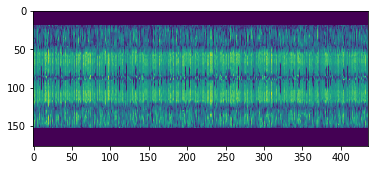

In [102]:
plt.imshow(D[100, ...])

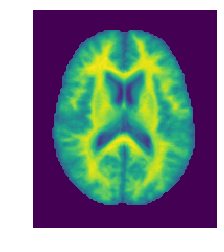

In [111]:
plt.imshow(D_m)
plt.axis('off')
plt.show()

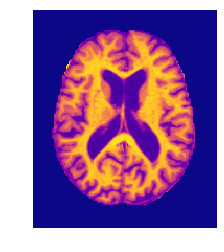

In [114]:
plt.imshow(D[..., 0], cmap = 'plasma')
plt.axis('off')
plt.show()

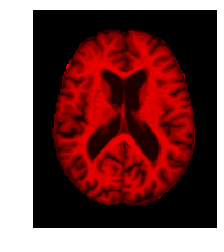

In [132]:
dim = np.zeros((208, 176))
R = np.stack(((D[..., 0]-np.min(D[..., 0]))/(np.max(D[..., 0]-np.min(D[..., 0]))), dim, dim), axis=2)
plt.imshow(R)
plt.axis('off')
plt.show()

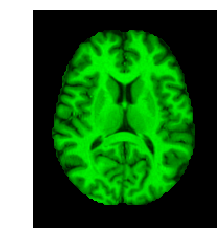

In [133]:
G = np.stack((dim, (D[..., 1]-np.min(D[..., 1]))/(np.max(D[..., 1]-np.min(D[..., 1]))), dim), axis=2)
plt.imshow(G)
plt.axis('off')
plt.show()

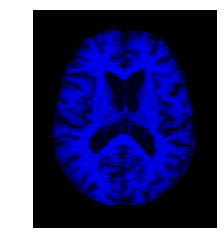

In [134]:
B = np.stack((dim, dim, (D[..., 2]-np.min(D[..., 2]))/(np.max(D[..., 2]-np.min(D[..., 2])))), axis=2)
plt.imshow(B)
plt.axis('off')
plt.show()

In [156]:
RGB = (R + G + B)

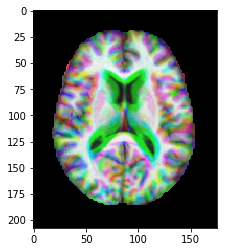

In [157]:
plt.imshow(RGB)

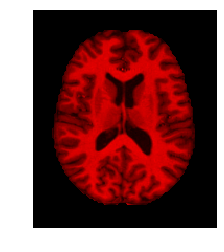

In [146]:
RR = np.stack(((D[..., 3]-np.min(D[..., 3]))/(np.max(D[..., 3]-np.min(D[..., 3]))), dim, dim), axis=2)
plt.imshow(RR)
plt.axis('off')
plt.show()

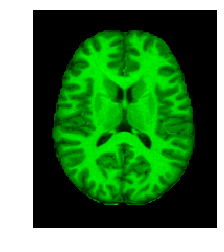

In [147]:
GG = np.stack((dim, (D[..., 4]-np.min(D[..., 4]))/(np.max(D[..., 4]-np.min(D[..., 4]))), dim), axis=2)
plt.imshow(GG)
plt.axis('off')
plt.show()

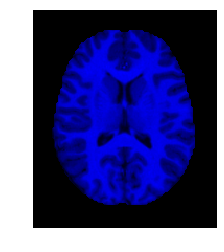

In [148]:
BB = np.stack((dim, dim, (D[..., 5]-np.min(D[..., 5]))/(np.max(D[..., 5]-np.min(D[..., 5])))), axis=2)
plt.imshow(BB)
plt.axis('off')
plt.show()

In [151]:
RRGGBB = RR + GG + BB

In [174]:
from scipy import ndimage

In [177]:
RGB_gaus = ndimage.filters.gaussian_filter(RGB, 1)

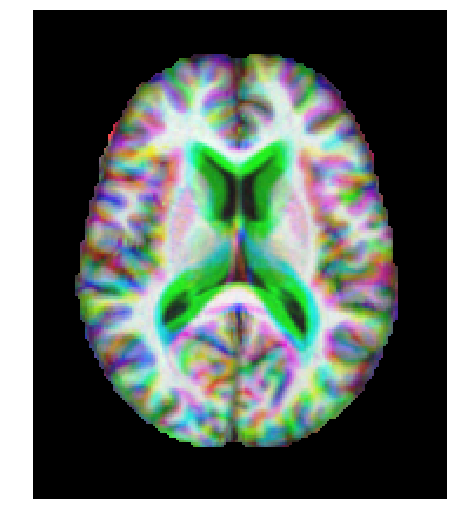

In [179]:
plt.figure(figsize=(9, 9))
plt.imshow(RGB)
plt.axis('off')
plt.show()

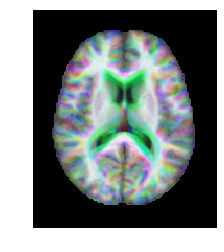

In [160]:
plt.imshow((RGB/2 + RRGGBB/2))
plt.axis('off')
plt.show()

In [161]:
RRR = np.stack(((D[..., 6]-np.min(D[..., 6]))/(np.max(D[..., 6]-np.min(D[..., 6]))), dim, dim), axis=2)
GGG = np.stack((dim, (D[..., 7]-np.min(D[..., 7]))/(np.max(D[..., 7]-np.min(D[..., 7]))), dim), axis=2)
BBB = np.stack((dim, dim, (D[..., 8]-np.min(D[..., 8]))/(np.max(D[..., 8]-np.min(D[..., 8])))), axis=2)

In [162]:
RRRGGGBBB = RRR + GGG + BBB

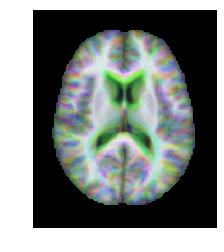

In [165]:
plt.imshow((RGB/3 + RRGGBB/3 + RRRGGGBBB/3))
plt.axis('off')
plt.show()

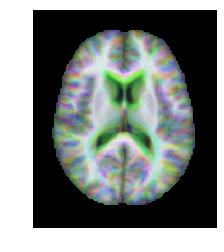

In [168]:
plt.imshow(np.mean(np.array([R, RR, RRR]), axis = 0) 
           + np.mean(np.array([G, GG, GGG]), axis = 0) + np.mean(np.array([B, BB, BBB]), axis = 0))
plt.axis('off')
plt.show()

In [288]:
imgname = "F:/mni_PD25_20170213_nifti/PD25-T1MPRAGE-template-0.5mm.nii.gz"
maskname = "F:/mni_PD25_20170213_nifti/PD25-atlas-mask-0.5mm.nii.gz"

In [289]:
img_nii = nib.load(imgname)
mask_nii = nib.load(maskname)

In [290]:
img = img_nii.get_fdata()
mask = mask_nii.get_fdata()

In [223]:
img.shape[2]/2

189.0

In [224]:
pic = img[:, :, 189 ]*mask[:, :, 189 ]

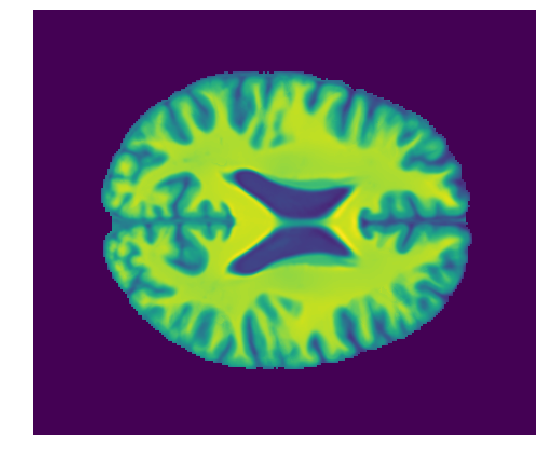

In [225]:
plt.figure(figsize=(9, 9))
plt.imshow(pic)
plt.axis('off')
plt.show()

In [226]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi

from skimage.morphology import watershed
from skimage.feature import peak_local_max

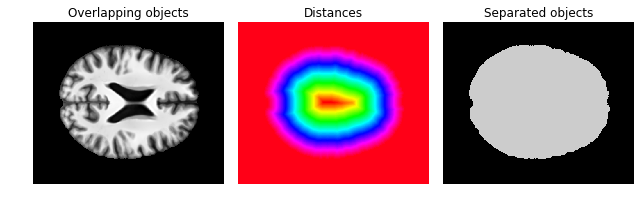

In [231]:
distance = ndi.distance_transform_edt(pic)
local_maxi = peak_local_max(distance, indices=False, footprint=np.ones((3, 3)),
                            labels=pic)
markers = ndi.label(local_maxi)[0]
labels = watershed(-distance, markers, mask=pic)

fig, axes = plt.subplots(ncols=3, figsize=(9, 3), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(pic, cmap=plt.cm.gray)
ax[0].set_title('Overlapping objects')
ax[1].imshow(-distance, cmap='hsv')
ax[1].set_title('Distances')
ax[2].imshow(labels, cmap=plt.cm.nipy_spectral)
ax[2].set_title('Separated objects')

for a in ax:
    a.set_axis_off()

fig.tight_layout()
plt.show()

Rotated images matched against references using Gabor filter banks:
original: brick, rotated: 30deg, match result: brick
original: brick, rotated: 70deg, match result: brick
original: grass, rotated: 145deg, match result: brick


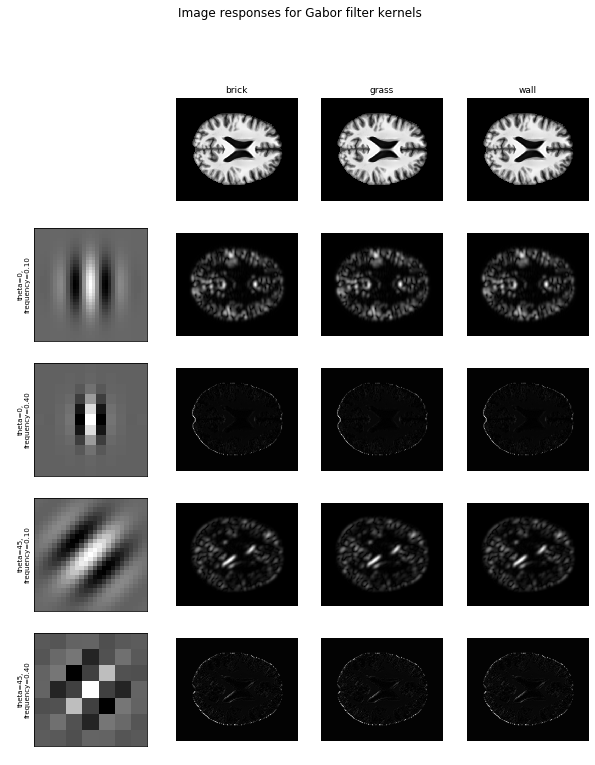

In [229]:
from __future__ import print_function

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage as nd

from skimage import data
from skimage.util import img_as_float
from skimage.filters import gabor_kernel


def compute_feats(image, kernels):
    feats = np.zeros((len(kernels), 2), dtype=np.double)
    for k, kernel in enumerate(kernels):
        filtered = nd.convolve(image, kernel, mode='wrap')
        feats[k, 0] = filtered.mean()
        feats[k, 1] = filtered.var()
    return feats


def match(feats, ref_feats):
    min_error = np.inf
    min_i = None
    for i in range(ref_feats.shape[0]):
        error = np.sum((feats - ref_feats[i, :])**2)
        if error < min_error:
            min_error = error
            min_i = i
    return min_i


# prepare filter bank kernels
kernels = []
for theta in range(4):
    theta = theta / 4. * np.pi
    for sigma in (1, 3):
        for frequency in (0.05, 0.25):
            kernel = np.real(gabor_kernel(frequency, theta=theta,
                                          sigma_x=sigma, sigma_y=sigma))
            kernels.append(kernel)


shrink = (slice(0, None, 3), slice(0, None, 3))
brick = pic
grass = pic
wall = pic
image_names = ('brick', 'grass', 'wall')
images = (brick, grass, wall)

# prepare reference features
ref_feats = np.zeros((3, len(kernels), 2), dtype=np.double)
ref_feats[0, :, :] = compute_feats(brick, kernels)
ref_feats[1, :, :] = compute_feats(grass, kernels)
ref_feats[2, :, :] = compute_feats(wall, kernels)

print('Rotated images matched against references using Gabor filter banks:')

print('original: brick, rotated: 30deg, match result: ', end='')
feats = compute_feats(nd.rotate(brick, angle=190, reshape=False), kernels)
print(image_names[match(feats, ref_feats)])

print('original: brick, rotated: 70deg, match result: ', end='')
feats = compute_feats(nd.rotate(brick, angle=70, reshape=False), kernels)
print(image_names[match(feats, ref_feats)])

print('original: grass, rotated: 145deg, match result: ', end='')
feats = compute_feats(nd.rotate(grass, angle=145, reshape=False), kernels)
print(image_names[match(feats, ref_feats)])


def power(image, kernel):
    # Normalize images for better comparison.
    image = (image - image.mean()) / image.std()
    return np.sqrt(nd.convolve(image, np.real(kernel), mode='wrap')**2 +
                   nd.convolve(image, np.imag(kernel), mode='wrap')**2)

# Plot a selection of the filter bank kernels and their responses.
results = []
kernel_params = []
for theta in (0, 1):
    theta = theta / 4. * np.pi
    for frequency in (0.1, 0.4):
        kernel = gabor_kernel(frequency, theta=theta)
        params = 'theta=%d,\nfrequency=%.2f' % (theta * 180 / np.pi, frequency)
        kernel_params.append(params)
        # Save kernel and the power image for each image
        results.append((kernel, [power(img, kernel) for img in images]))

fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(10, 12))
plt.gray()

fig.suptitle('Image responses for Gabor filter kernels', fontsize=12)

axes[0][0].axis('off')

# Plot original images
for label, img, ax in zip(image_names, images, axes[0][1:]):
    ax.imshow(img)
    ax.set_title(label, fontsize=9)
    ax.axis('off')

for label, (kernel, powers), ax_row in zip(kernel_params, results, axes[1:]):
    # Plot Gabor kernel
    ax = ax_row[0]
    ax.imshow(np.real(kernel), interpolation='nearest')
    ax.set_ylabel(label, fontsize=7)
    ax.set_xticks([])
    ax.set_yticks([])

    # Plot Gabor responses with the contrast normalized for each filter
    vmin = np.min(powers)
    vmax = np.max(powers)
    for patch, ax in zip(powers, ax_row[1:]):
        ax.imshow(patch, vmin=vmin, vmax=vmax)
        ax.axis('off')

plt.show()

In [235]:
import numpy as np
import matplotlib.pyplot as plt
from mayavi import mlab
from tvtk.api import tvtk
from tvtk.common import configure_input_data
from surfer import Brain

print(__doc__)

# 1) define helper functions


def norm(x):
    '''Normalise array betweeen 0-1'''
    return (x - np.min(x)) / (np.max(x) - np.min(x))


# 2) init brain and get spatial co-ordinates

# params
subjects_dir = os.environ['SUBJECTS_DIR']
hemi = 'lh'
surf = 'white'

# init figure
fig = mlab.figure()
b = Brain('fsaverage', hemi, surf, subjects_dir=subjects_dir,
          background='white', figure=fig)

# co-ordinates
x, y, z = b.geo[hemi].coords.T
tris = b.geo[hemi].faces


# 3) generate an rgba matrix, of shape n_vertices x 4

# define color map
cmap = plt.cm.viridis

# change colour based on position on the x axis
hue = norm(x)
colors = cmap(hue)[:, :3]

# change alpha based on position on the z axis
alpha = norm(z)

# combine hue and alpha into a Nx4 matrix
rgba_vals = np.concatenate((colors, alpha[:, None]), axis=1)


# 4) add data to plot

# plot points in x,y,z
mesh = mlab.pipeline.triangular_mesh_source(
    x, y, z, tris, figure=fig)
mesh.data.point_data.scalars.number_of_components = 4  # r, g, b, a
mesh.data.point_data.scalars = (rgba_vals * 255).astype('ubyte')

# tvtk for vis
mapper = tvtk.PolyDataMapper()
configure_input_data(mapper, mesh.data)
actor = tvtk.Actor()
actor.mapper = mapper
fig.scene.add_actor(actor)

RuntimeError: No traitsui.toolkits plugin found for toolkit null

In [237]:
from mayavi import mlab

RuntimeError: No traitsui.toolkits plugin found for toolkit null

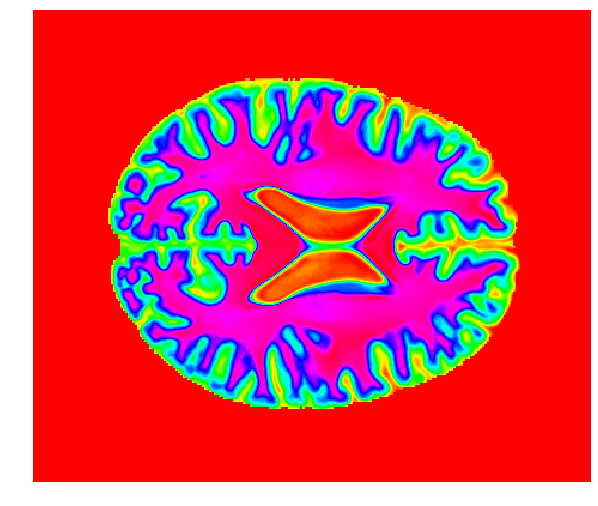

In [331]:
plt.figure(figsize=(10, 10))
plt.imshow(pic, cmap = 'hsv')
plt.axis('off')
plt.savefig('brain_hsv.png')
plt.show()


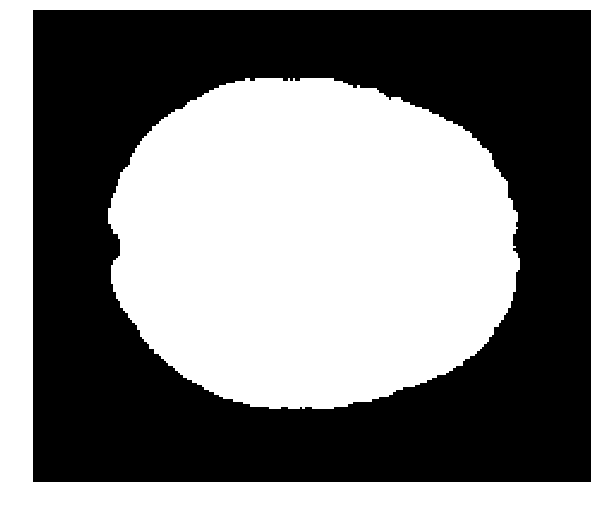

In [332]:
plt.figure(figsize=(10, 10))
plt.imshow(mask[:, :, 189])
plt.axis('off')
plt.savefig('brain_mask.png')
plt.show()


In [250]:
i = skimage.io.imread('C:/Users/e.lavrova/Documents/Python Scripts/csa_direction_field.png')

In [253]:
R = i[..., 0]
G = i[..., 1]
B = i[..., 2]

In [262]:
from skimage.morphology import dilation
from skimage.morphology import disk

In [277]:
R_d = dilation(R, disk(3))
G_d = dilation(G, disk(3))
B_d = dilation(B, disk(3))

In [269]:
R_d = dilation(R_d, disk(7))
G_d = dilation(G_d, disk(7))
B_d = dilation(B_d, disk(7))

In [278]:
i_d = np.stack((R_d, G_d, B_d), axis=2)

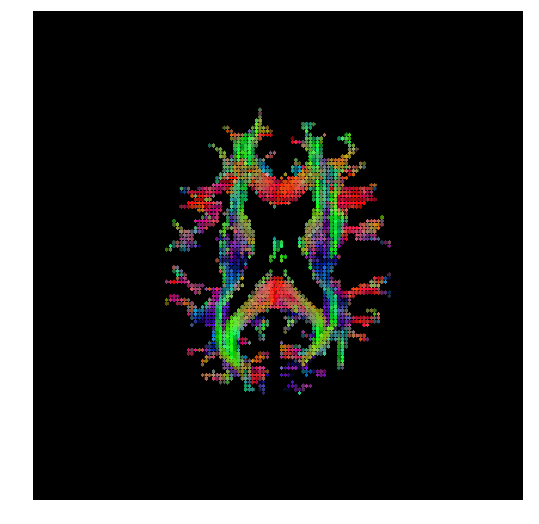

In [279]:
plt.figure(figsize=(9, 9))
plt.imshow(i_d)
plt.axis('off')
plt.show()

In [333]:
i = skimage.io.imread("C:/Users/e.lavrova/Desktop/brain_hsv.png")
m = skimage.io.imread("C:/Users/e.lavrova/Desktop/brain_mask.png")

In [334]:
R = i[..., 0]
G = i[..., 1]
B = i[..., 2]

In [335]:
R_m = m[..., 0]
G_m = m[..., 1]
B_m = m[..., 2]

In [336]:
m_m = R_m/np.max(R_m)

In [337]:
R_ = R*m_m
G_ = G*m_m
B_ = B*m_m

In [338]:
i_ = np.stack((R_, G_, B_), axis=2)

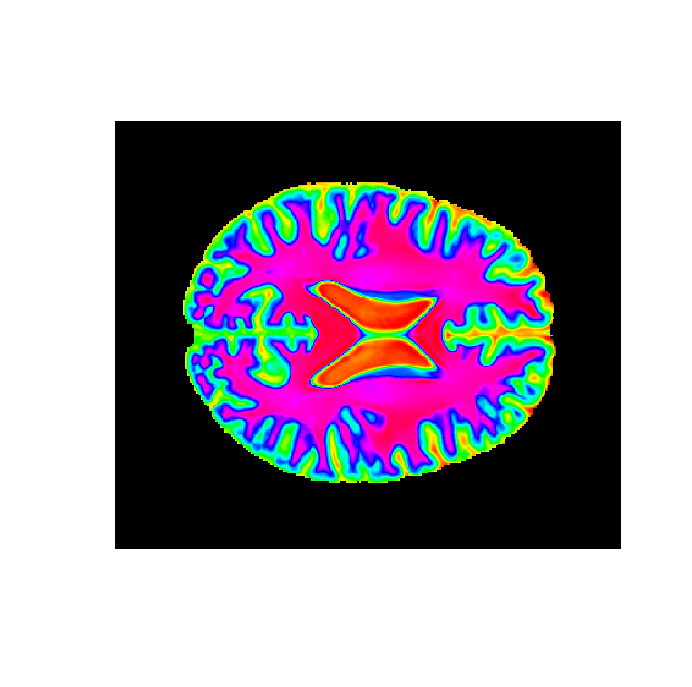

In [341]:
plt.figure(figsize=(12, 12))
plt.imshow(i_/255)
plt.axis('off')
plt.savefig('9.png')
plt.show()